# **Sample Data**

We generated a dataset of **50 rows** and **10 columns** to represent different types of features:

- **Feature1**: Normally distributed values around 50 with a standard deviation of 10.
- **Feature2**: Normally distributed values around 100 with a standard deviation of 15.
- **Feature3**: Random integers between 0 and 100.
- **Feature4**: Random integers between 0 and 1000.
- **Category1**: Categorical variable with values 'A', 'B', 'C'.
- **Category2**: Binary categorical variable with values 'X', 'Y'.
- **Binary**: Binary variable with values 0 or 1.
- **Date**: Sequential dates from '2023-01-01' onward.
- **Feature5**: Normally distributed values around 200 with a standard deviation of 20.
- **Feature6**: Random integers between 0 and 500.

In [1]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.normal(50, 10, 50),
    'Feature2': np.random.normal(100, 15, 50),
    'Feature3': np.random.randint(0, 100, 50),
    'Feature4': np.random.randint(0, 1000, 50),
    'Category1': np.random.choice(['A', 'B', 'C'], 50),
    'Category2': np.random.choice(['X', 'Y'], 50),
    'Binary': np.random.choice([0, 1], 50),
    'Date': pd.date_range(start='2023-01-01', periods=50, freq='D'),
    'Feature5': np.random.normal(200, 20, 50),
    'Feature6': np.random.randint(0, 500, 50)
})


# ***Beginner Visualizations***

## 1. Histogram (Univariate Distribution)

- **Visualization**: A histogram shows the distribution of a single variable. The **x-axis** represents the bins (value ranges), and the **y-axis** represents the frequency. A **Kernel Density Estimate (KDE)** shows the probability density.
- **Purpose**: To understand how the data is distributed (e.g., normal, skewed, etc.).
- **Data**: `Feature1` shows a normal distribution with a mean around 50.


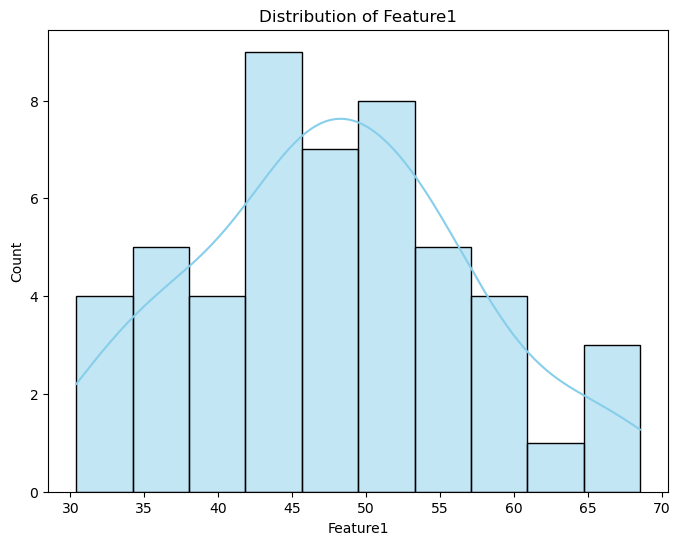

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Feature1
plt.figure(figsize=(8, 6))
sns.histplot(data['Feature1'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Feature1')
plt.show()



## 2. Bar Plot (Categorical vs Numeric)

**Description**:  
A **bar plot** shows the relationship between a categorical variable and a numeric variable. The x-axis represents the categories, while the y-axis shows the average or sum of the numeric values for each category.

- **Purpose**: To compare the influence of categories on a numeric feature.
- **Data**: Mean of Feature2 across categories of Category1.

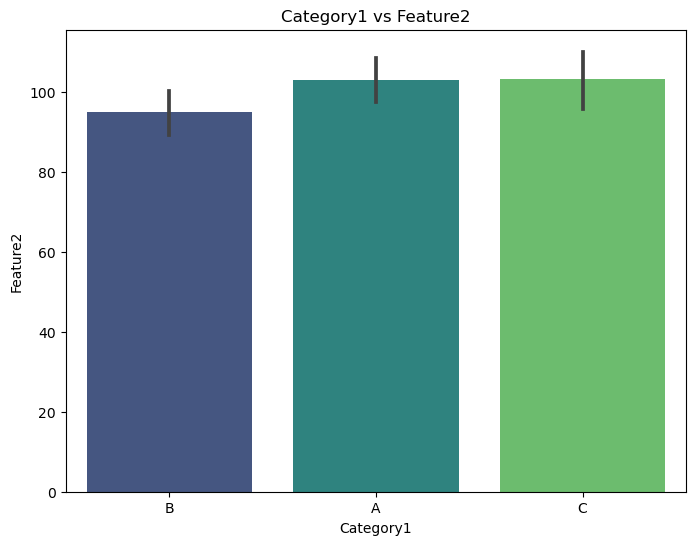

In [4]:
# Bar plot for Category1 and Feature2
plt.figure(figsize=(8, 6))
sns.barplot(x='Category1', y='Feature2', data=data, palette='viridis')
plt.title('Category1 vs Feature2')
plt.show()


# ***Intermediate Visualizations***


## 1. Box Plot (Categorical vs Numeric with Outliers)
### Description:
A **box plot** displays the distribution of a numeric variable for each category, including the **median**, **interquartile range (IQR)**, and outliers. The **whiskers** show the spread of the data, while **outliers** are represented as individual points.

**Purpose**:  
To observe the spread and detect outliers across categories.

**Data**:  
Distribution of `Feature3` across categories in `Category1`.


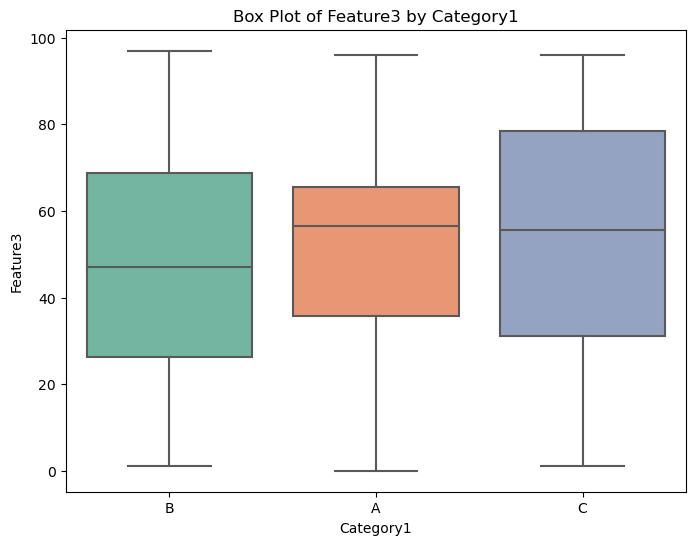

In [5]:
# Box plot for Category1 and Feature3
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category1', y='Feature3', data=data, palette='Set2')
plt.title('Box Plot of Feature3 by Category1')
plt.show()


### 2. Pair Plot (Multivariate Relationships)

**Description**:  
A **pair plot** visualizes pairwise relationships between multiple numeric variables by plotting **scatter plots** for each pair and **histograms** for individual variables.

**Purpose**:  
To explore relationships and correlations between numeric features.

**Data**:  
Pairwise relationships between `Feature1`, `Feature2`, `Feature3`, and `Feature5`.


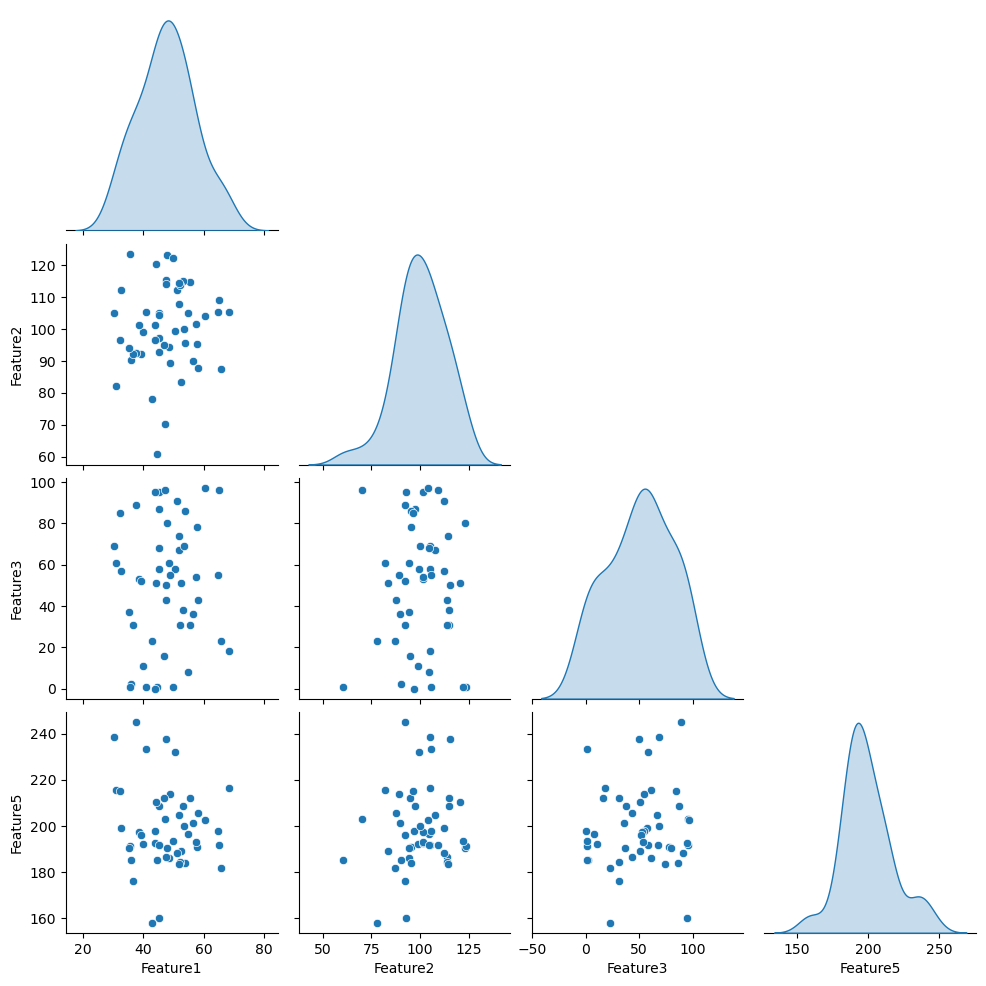

In [6]:
# Pairplot for several numeric features
sns.pairplot(data[['Feature1', 'Feature2', 'Feature3', 'Feature5']], diag_kind='kde', corner=True)
plt.show()


### 3. Heatmap (Correlation Matrix)

**Description**:  
A **heatmap** of the correlation matrix shows the **correlation coefficients** between multiple numeric variables. The values range from **-1** (strong negative correlation) to **1** (strong positive correlation), and the **color intensity** indicates the strength of the correlation.

**Purpose**:  
To understand the linear relationships between multiple numeric variables.

**Data**:  
Correlations between `Feature1`, `Feature2`, `Feature3`, `Feature5`, and `Feature6`.


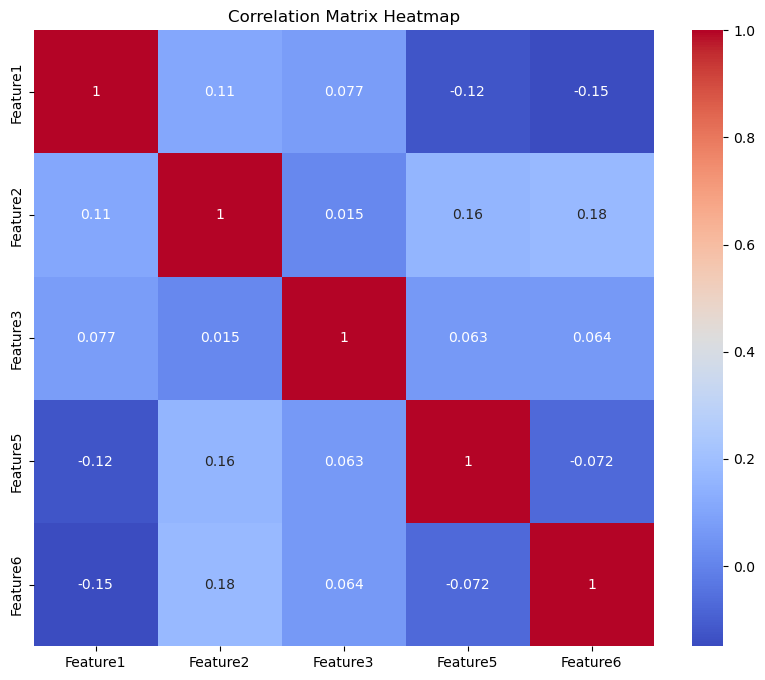

In [7]:
# Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Feature1', 'Feature2', 'Feature3', 'Feature5', 'Feature6']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# ***Advanced Visualizations***

### 1. Violin Plot (Distribution and Density by Category)

**Description**:  
A **violin plot** shows the **distribution** and **density** of a numeric variable across categories. It combines a **box plot** and a **KDE** to visualize the distribution shape for each category.

**Purpose**:  
To compare the distribution of a numeric variable across different categories.

**Data**:  
Distribution of `Feature5` for categories in `Category2`.


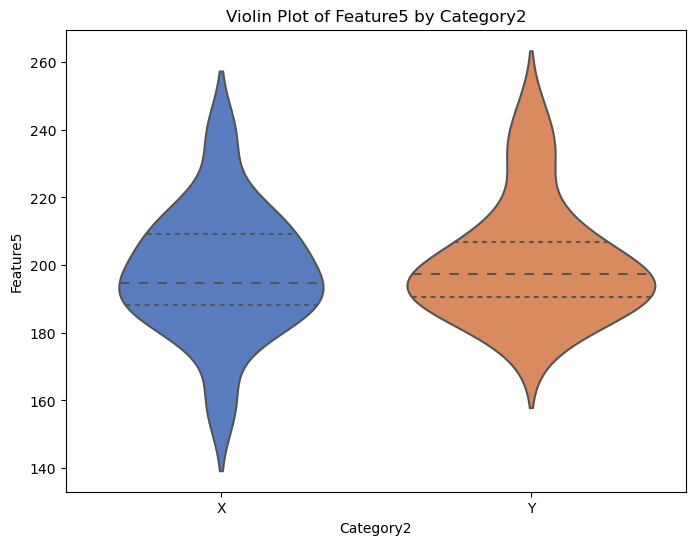

In [8]:
# Violin plot for Category2 and Feature5
plt.figure(figsize=(8, 6))
sns.violinplot(x='Category2', y='Feature5', data=data, palette='muted', inner='quartile')
plt.title('Violin Plot of Feature5 by Category2')
plt.show()


### 2. FacetGrid (Categorical vs Multiple Features)

**Description**:  
A **FacetGrid** allows you to plot multiple **subplots** based on a categorical variable, facilitating comparison of relationships between numeric features across different categories.

**Purpose**:  
To compare relationships across categories.

**Data**:  
Relationship between `Feature1` and `Feature2` for each category in `Category2`.


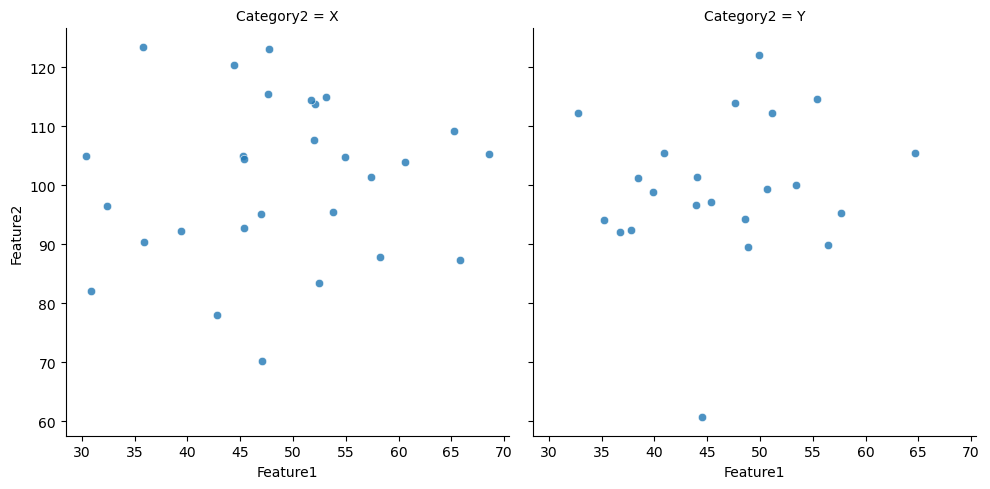

In [9]:
# FacetGrid for Category2 vs Feature1 and Feature2
g = sns.FacetGrid(data, col='Category2', height=5)
g.map(sns.scatterplot, 'Feature1', 'Feature2', alpha=.8)
plt.show()


### 3. Joint Plot (Two Variables with Regression)

**Description**:  
A **joint plot** combines a **scatter plot** with **histograms** for two numeric variables, and it can also show a **regression line** to indicate linear relationships.

**Purpose**:  
To show the relationship between two variables along with their distributions.

**Data**:  
Relationship between `Feature1` and `Feature2`.


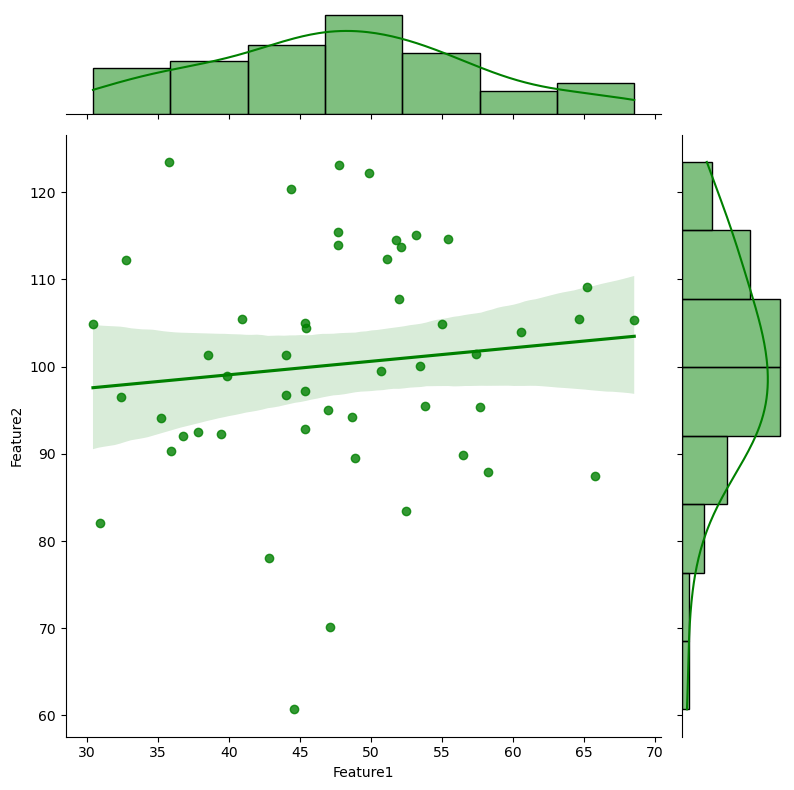

In [10]:
# Joint plot with regression line for Feature1 and Feature2
sns.jointplot(x='Feature1', y='Feature2', data=data, kind='reg', height=8, color='g')
plt.show()


### 4. Time Series Plot (Date vs Numeric)

**Description**:  
A **time series plot** visualizes how a numeric variable changes over time, with the **x-axis** representing time and the **y-axis** representing the numeric values.

**Purpose**:  
To observe trends or patterns over time.

**Data**:  
Time series of `Feature4` over dates in the `Date` column.


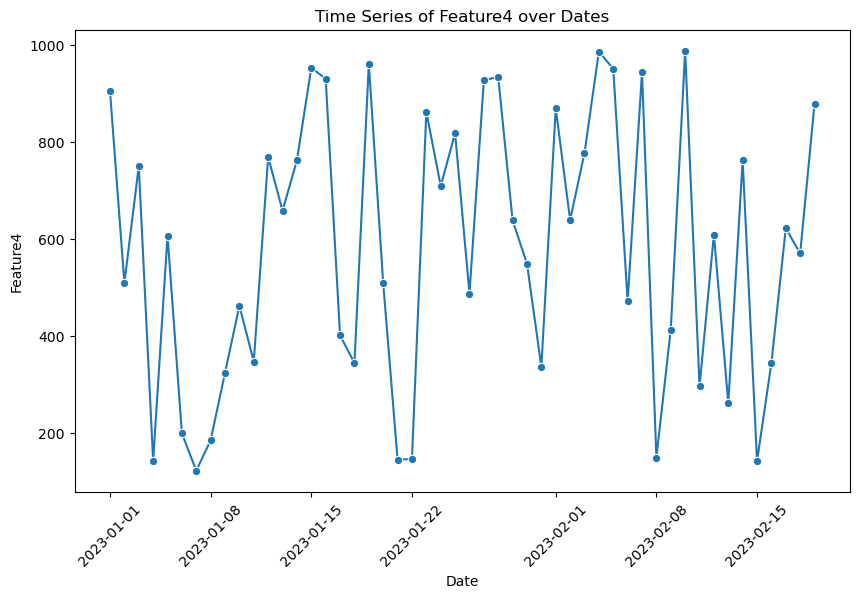

In [11]:
# Time series plot for Date and Feature4
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Feature4', data=data, marker='o')
plt.title('Time Series of Feature4 over Dates')
plt.xticks(rotation=45)
plt.show()


# ***Advanced Multi-Dimensional Visualization***

### 1. Clustered Heatmap

**Description**:  
A **clustered heatmap** groups similar variables together and visualizes the **correlations** between them. It uses **hierarchical clustering** to group similar variables and show their relationships.

**Purpose**:  
To identify patterns and relationships between features using clustering.

**Data**:  
Clustered correlation matrix of features.


<Figure size 1200x1000 with 0 Axes>

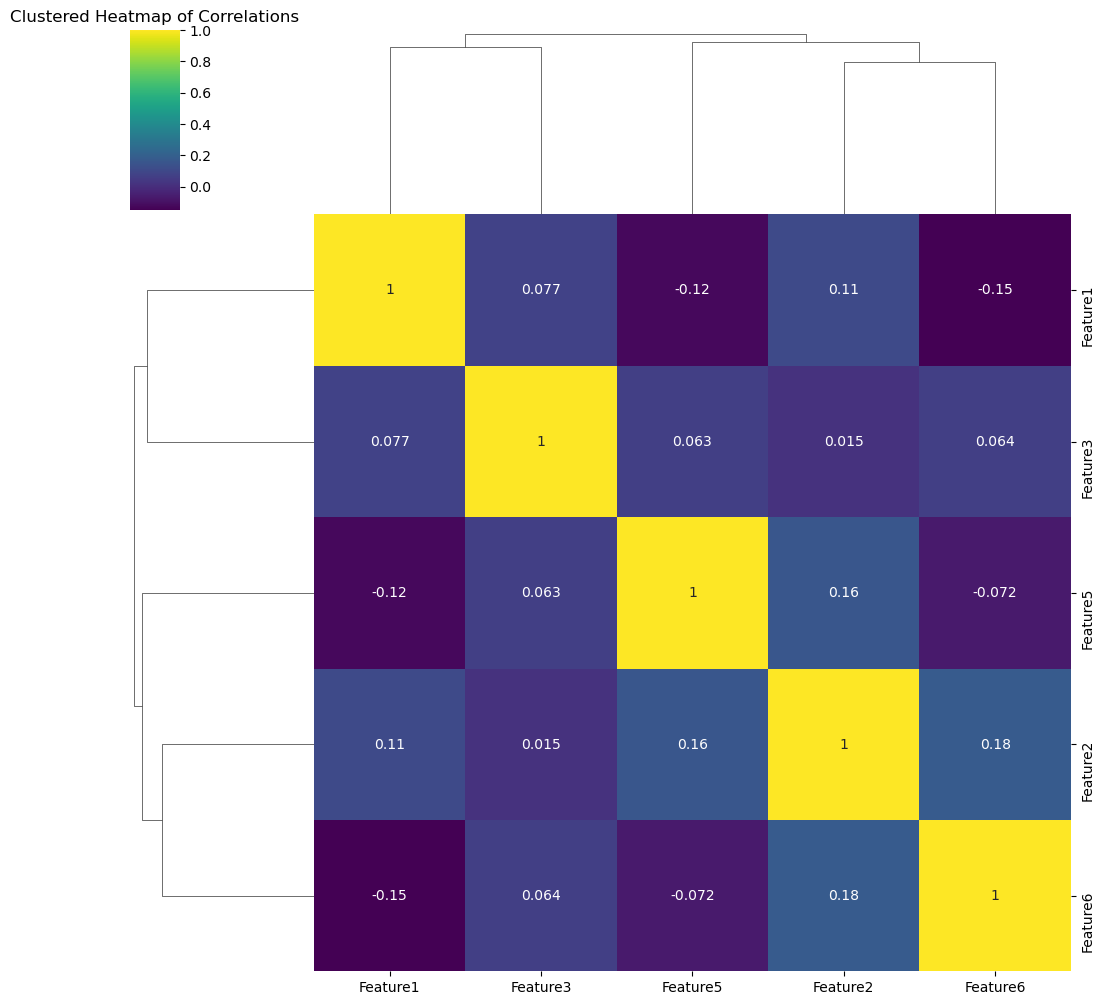

In [12]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# Clustered heatmap of features
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, annot=True, cmap='viridis', metric='euclidean')
plt.title('Clustered Heatmap of Correlations')
plt.show()


Summary
Beginner: Histograms, bar plots, and simple comparisons.
Intermediate: Pair plots, box plots, and correlation heatmaps.
Advanced: Violin plots, facet grids, joint plots, and time series.
These steps guide you from basic data visualizations to more advanced, multi-dimensional techniques using seaborn and matplotlib.






